<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/24-1/0524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 04 합성곱 신경망(CNN)

## 01 합성곱 신경망

### 1-1 이미지 표현

### 1-2 합성곱(Convolution)

### 1-3 채널(channel)

### 1-4 스트라이드(stride)

### 1-5 패딩(padding)

### 1-6 특성맵(feature map) 사이즈

### 1-7 풀링(pooling)

## 02 간단한 모델 생성

### 2-1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


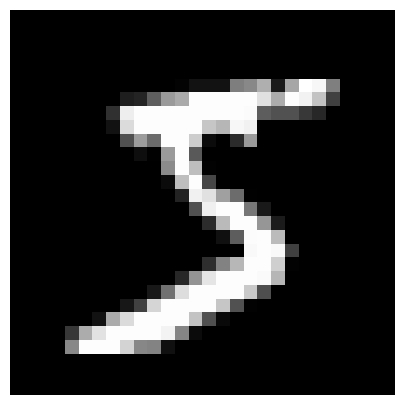

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습

In [7]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2174 - accuracy: 0.9377 - val_loss: 0.0934 - val_accuracy: 0.9709
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0800 - accuracy: 0.9762 - val_loss: 0.0699 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0672 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0601 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0600 - val_accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0533 - val_accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 0.0512 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 8ms/step - loss: 0.0551 - accuracy: 0.9851


[0.05510067567229271, 0.9850999712944031]

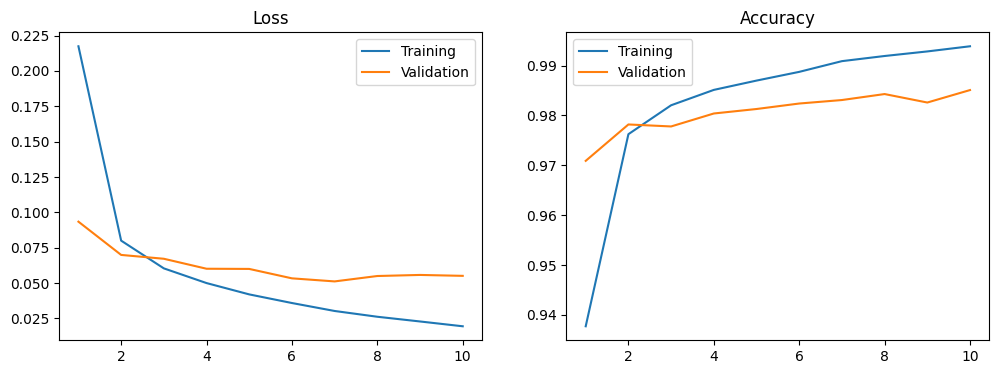

In [10]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [13]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [14]:
# 레이어
model.layers

In [15]:
# 첫번째 레이어 선택
model.layers[0]

In [16]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [17]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [18]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-6.04764462e-01, -3.22978616e-01,  3.25263470e-01,
            1.52645916e-01, -8.09904277e-01,  3.33823502e-01,
            2.68445373e-01, -1.50860054e-02, -9.20225143e-01,
            4.44548041e-01, -4.69873726e-01, -9.02077138e-01,
            3.18718344e-01,  3.13419610e-01, -4.51452106e-01,
           -1.65701792e-01, -1.04414690e+00, -6.95607543e-01,
           -1.00217557e+00,  1.56258523e-01, -3.47849399e-01,
           -6.49038076e-01,  3.06781173e-01,  3.16537678e-01,
            7.15583622e-01, -2.61318963e-02,  1.66222498e-01,
           -2.73404270e-01,  3.38262886e-01,  1.41997278e-01,
           -2.23067358e-01, -2.89423525e-01]],
 
         [[ 1.27063453e-01,  2.52349535e-04, -1.15132689e-01,
            4.10323739e-01, -6.67634487e-01,  5.33340752e-01,
           -2.56867260e-02,  9.44369379e-03, -1.04296923e+00,
            1.76910207e-01, -1.69962525e-01, -9.84365106e-01,
           

In [19]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-6.04764462e-01, -3.22978616e-01,  3.25263470e-01,
           1.52645916e-01, -8.09904277e-01,  3.33823502e-01,
           2.68445373e-01, -1.50860054e-02, -9.20225143e-01,
           4.44548041e-01, -4.69873726e-01, -9.02077138e-01,
           3.18718344e-01,  3.13419610e-01, -4.51452106e-01,
          -1.65701792e-01, -1.04414690e+00, -6.95607543e-01,
          -1.00217557e+00,  1.56258523e-01, -3.47849399e-01,
          -6.49038076e-01,  3.06781173e-01,  3.16537678e-01,
           7.15583622e-01, -2.61318963e-02,  1.66222498e-01,
          -2.73404270e-01,  3.38262886e-01,  1.41997278e-01,
          -2.23067358e-01, -2.89423525e-01]],

        [[ 1.27063453e-01,  2.52349535e-04, -1.15132689e-01,
           4.10323739e-01, -6.67634487e-01,  5.33340752e-01,
          -2.56867260e-02,  9.44369379e-03, -1.04296923e+00,
           1.76910207e-01, -1.69962525e-01, -9.84365106e-01,
           1.27602845e-01, -

In [20]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [21]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]] )
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 87ms/step


2

In [22]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

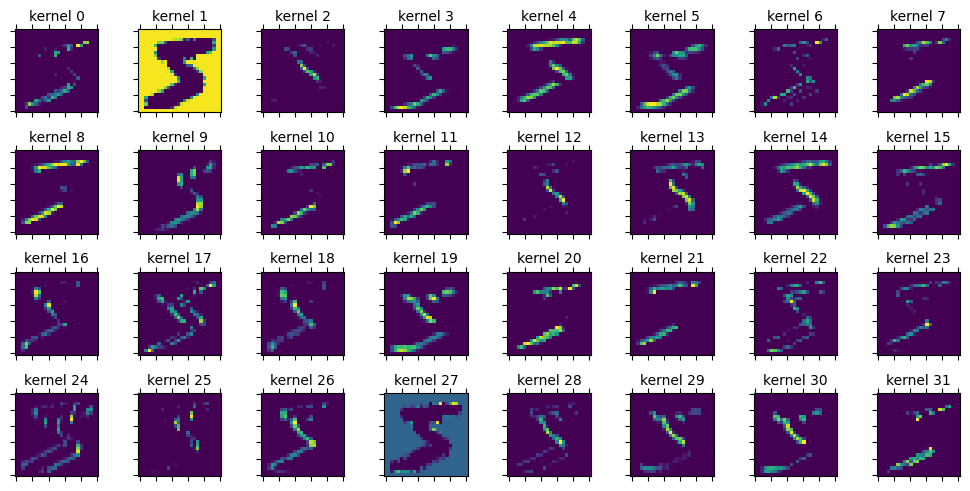

In [23]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


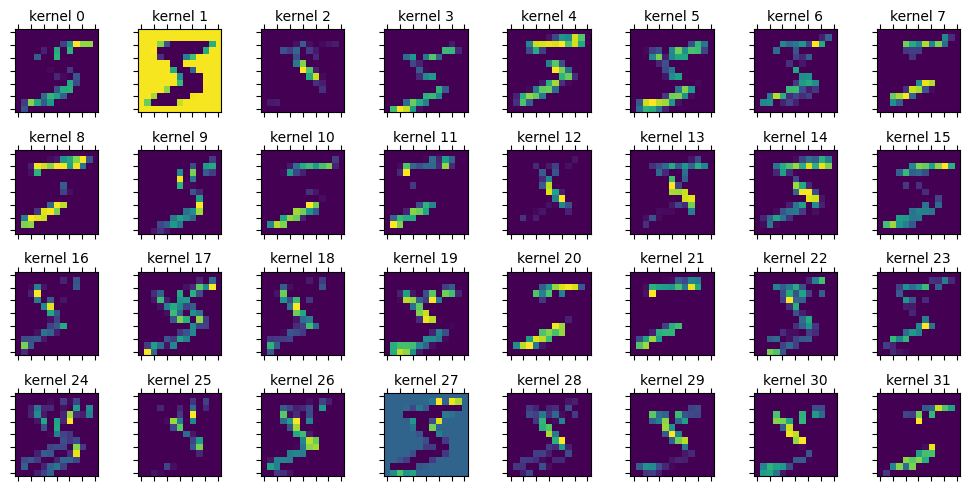

In [27]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03 복잡한 모델 생성

### 3-1 데이터셋 준비

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [30]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [33]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Functional API로 다중 입력, 다중 출력 레이어 생성



*   Sequence API의 겨웅 레이어를 층층이 한 줄로 연결할 수밖에 없지만, Functional API를 사용하면 다중 입력 또는 다중 출력 같은 구조를 만들 수 있음

*   입력 레이어 inputs의 경우, Conv2D 레이어와 Flatten 레이어의 입력으로 사용 -> 입력 레이어는 2개의 출력 -> 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용 -> 최종적으로 Concatenate 레이어에서 합쳐진 다음 Dense 레이어를 통과
*   함수의 입력과 출력으로 표현 -> 자유롭게 모델 구조 정의



In [34]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

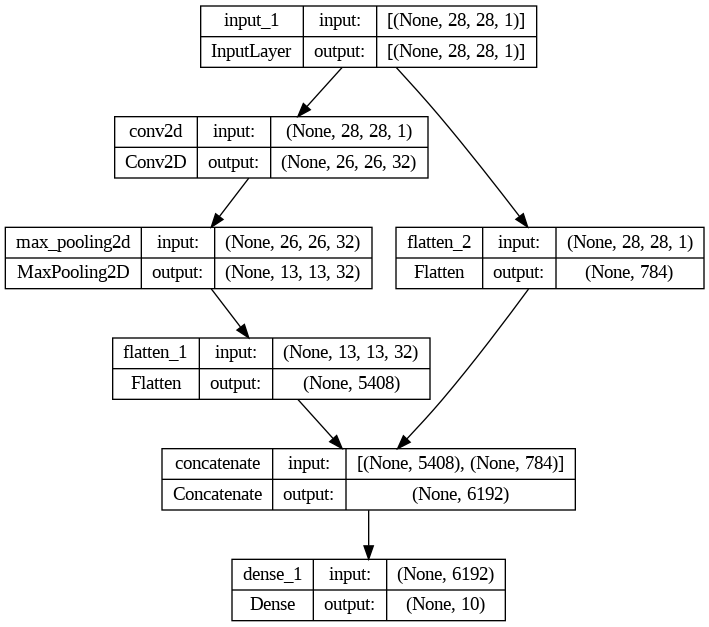

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1937 - accuracy: 0.9445 - val_loss: 0.0851 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0714 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0701 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0572 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0567 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0651 -

### 3-3 다중 출력 분류 모델



*   서로 다른 분류 문제를 예특하는 다중 출력 모델
*   각각 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심



In [38]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


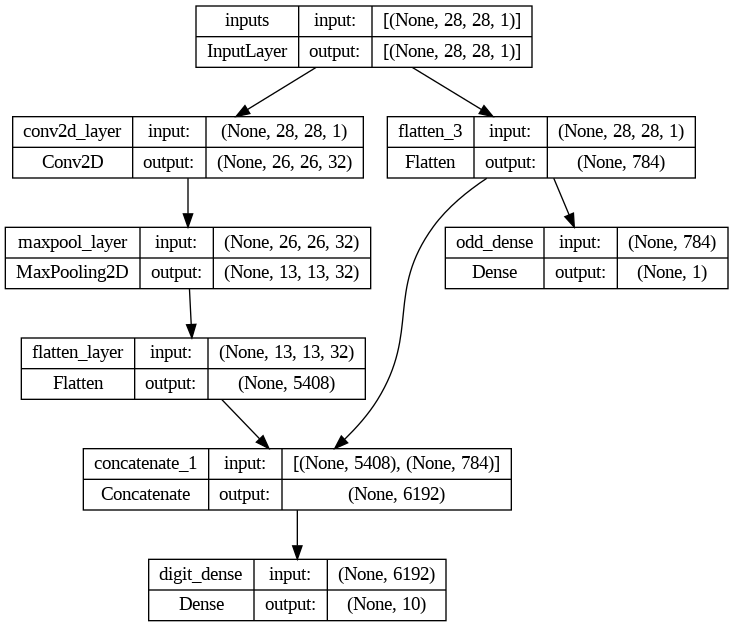

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3788 - digit_dense_loss: 0.2165 - odd_dense_loss: 0.3247 - digit_dense_accuracy: 0.9377 - odd_dense_accuracy: 0.8644 - val_loss: 0.2265 - val_digit_dense_loss: 0.0892 - val_odd_dense_loss: 0.2746 - val_digit_dense_accuracy: 0.9735 - val_odd_dense_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2142 - digit_dense_loss: 0.0785 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9771 - odd_dense_accuracy: 0.8911 - val_loss: 0.2023 - val_digit_dense_loss: 0.0694 - val_odd_dense_loss: 0.2658 - val_digit_dense_accuracy: 0.9780 - val_odd_dense_accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1924 - digit_dense_loss: 0.0611 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9817 - odd_dense_accuracy: 0.8959 - val_loss: 0.1985 - val_digit_dense_loss: 0.0678 - val_odd_dense_loss: 0.2614 - val_digit_dense_accuracy: 0.9774 -

In [42]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 6ms/step - loss: 0.1879 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2549 - digit_dense_accuracy: 0.9823 - odd_dense_accuracy: 0.9027


[0.18793942034244537,
 0.06047121062874794,
 0.2549362778663635,
 0.9822999835014343,
 0.9027000069618225]

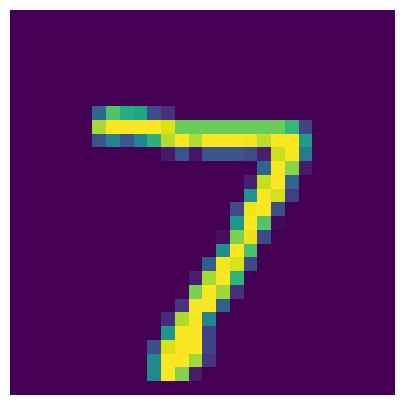

In [43]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [44]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[1.2560356e-12 1.3242436e-09 1.1301671e-09 7.2898479e-06 1.9783192e-11
 3.6314129e-11 3.3804203e-20 9.9999267e-01 2.9520617e-09 3.4580264e-08]
[0.99958885]


In [45]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [47]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 3-4 전이 학습(Transfer Learning)



*   앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델 재구성
*   기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념



In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


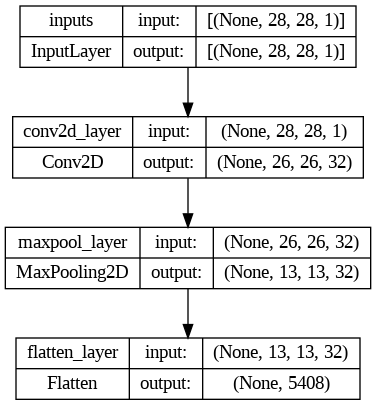

In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [50]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


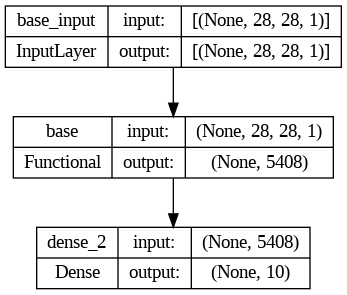

In [51]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1309 - accuracy: 0.9630 - val_loss: 0.0693 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0526 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0586 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0598 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0612 -

In [53]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [54]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1181 - accuracy: 0.9685 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0516 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0534 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0520 - val_accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0563 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.0612 - val_ac

In [56]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [57]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1176 - accuracy: 0.9680 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0494 - accuracy: 0.9858 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0532 - val_accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0556 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0519 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0581 - val_ac